In [36]:
import sys
import os 
import numpy as np                     # For mathematical calculations 
from scipy import stats
import seaborn as sns                  # For data visualization 
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import pandas as pd
from pandas_profiling import ProfileReport

### Autocompletar

In [37]:
%config IPCompleter.greedy=True

In [38]:
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'bank-marketing.csv',
 'Decision Trees-Scikit-Learn.ipynb',
 'Loan Prediction.ipynb',
 'Portafolio_Optimo.ipynb',
 'pyspark.ipynb',
 'report.html',
 'Reporte_Profiel.html',
 'Reporte_Profile.html',
 'Reporte_Profile_Loan_Prediction.html',
 'Resumen_de_Estadisticas.csv',
 'sample_submission_49d68Cx.csv',
 'test_lAUu6dG.csv',
 'train_ctrUa4K.csv']

### Acelerar PANDAS

os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
#os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask

import modin.pandas as pd

export MODIN_OUT_OF_CORE=true  ###environment variable to enable this functionalit

In [39]:
#pip install jupyter-tabnine
#jupyter nbextension install --py jupyter_tabnine
#jupyter nbextension enable --py jupyter_tabnine
#jupyter serverextension enable --py jupyter_tabnine

# in conda terminal
#conda install -c conda-forge jupyter_nbextensions_configurator
#jupyter nbextension enable hinterland/hinterland

#%matplotlib notebook
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
import ray
ray.init(num_cpus=4)
import ray.dataframe as pd

In [40]:
df=pd.read_csv('train_ctrUa4K.csv')
df.shape

(614, 13)

In [41]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


### Comprobar correcta lectura de los datos

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [62]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [63]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_notebook_iframe()
#profile.to_widgets()

In [64]:
train=pd.read_csv("train_ctrUa4K.csv") 
test=pd.read_csv("test_lAUu6dG.csv")

# Estadísticas de las Variables

In [65]:
# Mostrando algunos estadísticos para todas las variables numéricas
#np.round(df.describe(), 2).T ---> Transpuesta
np.round(df.describe(), 2)

# Generando un csv con el resumen de Estadísticas
# Descarga de base de datos

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


In [66]:
#from google.colab import files
#file_name = 'Resumen_de_Estadisticas.csv'
#df.describe().transpose().to_csv(file_name, sep=',',encoding='utf-8',index = True)
#files.download(file_name)

pd.crosstab(train['Dependents'],train['Dependents'])

Dependents,0,1,2,3+
Dependents,,,,
0,345,0,0,0
1,0,102,0,0
2,0,0,101,0
3+,0,0,0,51


In [67]:
train_original=train.copy() 
test_original=test.copy()

In [68]:
train.shape, test.shape

((614, 13), (367, 12))

In [69]:
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [70]:
train.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [71]:
train.shape, test.shape

((614, 13), (367, 12))

### Explorando la distribución de la variable objetivo


In [72]:
train.Loan_Status.value_counts(),  train.Loan_Status.value_counts(normalize=True)

(Y    422
 N    192
 Name: Loan_Status, dtype: int64, Y    0.687296
 N    0.312704
 Name: Loan_Status, dtype: float64)

In [73]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [74]:
 train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### Tablas de Contingencia

In [57]:
r = train.Loan_Status.count()
print(r)

614


In [58]:
train.groupby('Loan_Status').size()

Loan_Status
N    192
Y    422
dtype: int64

In [59]:
default_balance = pd.DataFrame(train.groupby('Loan_Status').size())
default_balance

,0
Loan_Status,
N,192
Y,422


In [60]:
default_balance.columns = ['Total']
default_balance['Dist. %'] = default_balance.Total*100/r

In [61]:
print(train.shape)
default_balance

(614, 13)


,Total,Dist. %
Loan_Status,,
N,192,31.270358
Y,422,68.729642


In [30]:
r = train.Loan_Status.count()
df.groupby('Loan_Status').size()
default_balance = pd.DataFrame(train.groupby('Loan_Status').size())
default_balance.columns = ['Total']
default_balance['Dist. %'] = default_balance.Total*100/r
print(train.shape)
default_balance

(614, 13)


,Total,Dist. %
Loan_Status,,
N,192,31.270358
Y,422,68.729642


In [34]:
import pandas_profiling
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [35]:
profile = pandas_profiling.ProfileReport(df)
display(profile)
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

NotFoundError: plot.histogram.max_bins not found

NameError: name 'ProfileReport' is not defined

In [75]:
#pandas_profiling.to_file("Reporte_Profile.html")
report = pandas_profiling.ProfileReport(df)
report.to_file("Reporte_Profile_Loan_Prediction.html")

NotFoundError: plot.histogram.max_bins not found

Text(0, 0.5, 'LoanAmount')

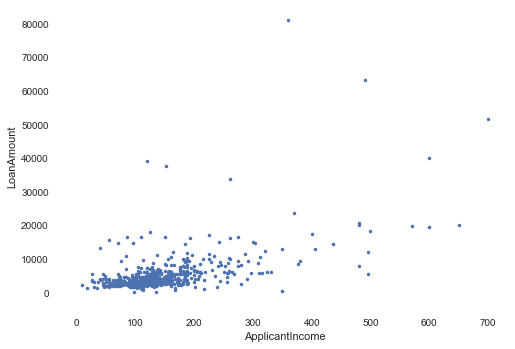

In [32]:
#%matplotlib notebook
#c= Education
#s= Dependents
#plt.scatter(y='ApplicantIncome', x ='LoanAmount', alpha=0.5)
#plt.show()

ApplicantIncome = train['ApplicantIncome']
LoanAmount = train['LoanAmount']
fig, ax = plt.subplots(1, 1)
ax.plot(LoanAmount, ApplicantIncome,'.')
ax.set_xlabel('ApplicantIncome')
ax.set_ylabel('LoanAmount')

In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
##https://github.com/giacman/DataScienceAnalyticsPython/blob/master/notebooks/02-regression.ipynb

In [64]:
df.replace('unknown', np.NAN, inplace=True)

In [65]:
df = df.dropna()

In [66]:
train.replace('unknown', np.NAN, inplace=True)

In [67]:
train = train.dropna()

In [69]:
# AI_LAM = sm.add_constant(AI_LAM)

In [70]:
regression1 = sm.OLS(train['ApplicantIncome'], train['LoanAmount']).fit()
print(regression1.summary())

                                 OLS Regression Results                                
Dep. Variable:        ApplicantIncome   R-squared (uncentered):                   0.602
Model:                            OLS   Adj. R-squared (uncentered):              0.601
Method:                 Least Squares   F-statistic:                              724.2
Date:                Wed, 17 Jun 2020   Prob (F-statistic):                    7.45e-98
Time:                        02:47:53   Log-Likelihood:                         -4761.7
No. Observations:                 480   AIC:                                      9525.
Df Residuals:                     479   BIC:                                      9530.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
regression2 = smf.ols(formula='LoanAmount~ApplicantIncome',data=train).fit()
print(regression2.summary())

                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     155.4
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           4.45e-31
Time:                        02:37:56   Log-Likelihood:                -2719.4
No. Observations:                 480   AIC:                             5443.
Df Residuals:                     478   BIC:                             5451.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         106.9977      4.402     

In [50]:
regression1.params

LoanAmount    36.545757
dtype: float64

In [51]:
regression2.params

Intercept          106.997749
ApplicantIncome      0.007035
dtype: float64

In [52]:
new_ApplicantIncome = np.linspace(0,100000,10)
new_ApplicantIncome = new_ApplicantIncome[:,np.newaxis]

In [53]:
LoanAmount_pred = regression2.predict(exog=dict(ApplicantIncome=new_ApplicantIncome))
print(LoanAmount_pred)

0    106.997749
1    185.165039
2    263.332329
3    341.499619
4    419.666909
5    497.834198
6    576.001488
7    654.168778
8    732.336068
9    810.503358
dtype: float64


In [59]:
from sklearn import linear_model
from mlxtend.plotting import plot_linear_regression

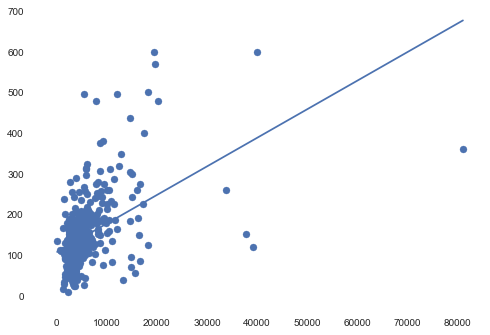

In [62]:
dataframe = pd.DataFrame(train,columns=['ApplicantIncome','LoanAmount'])

ApplicantIncome=dataframe['ApplicantIncome'].values[:,np.newaxis]
LoanAmount=dataframe['LoanAmount'].values[:,np.newaxis]

sk_reg = linear_model.LinearRegression()
sk_reg.fit(ApplicantIncome, LoanAmount)
prediction=sk_reg.predict(np.sort(ApplicantIncome, axis=0))

ax = plt.scatter(ApplicantIncome, LoanAmount)
ax = plt.plot(np.sort(ApplicantIncome, axis=0),prediction)
#ax.text(0.1,0.9, "$r^2={0:.3f},p{0:0.3e}$".format(r_value**2, p_value),transform =ax.transAxes)
#intercept, slope, corr_coeff = plot_linear_regression(ApplicantIncome, LoanAmount)
plt.show()

In [144]:
LoanAmount_pred = sk_reg.predict(new_ApplicantIncome)
print(LoanAmount_pred)

[[106.99774893]
 [185.16503884]
 [263.33232876]
 [341.49961867]
 [419.66690859]
 [497.8341985 ]
 [576.00148841]
 [654.16877833]
 [732.33606824]
 [810.50335815]]


In [131]:
print(sk_reg.coef_)

[[0.00703506]]


In [133]:
print(sk_reg.intercept_)

[106.99774893]


In [141]:
print(sk_reg.score(LoanAmount, ApplicantIncome))

-0.8615965312658593


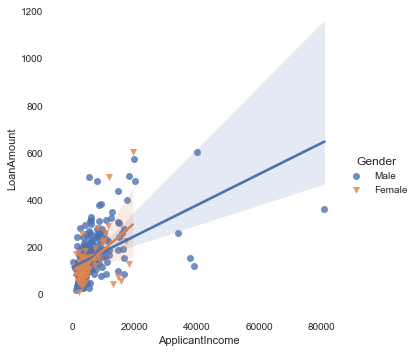

In [72]:
df1 = sns.lmplot(data=df, x='ApplicantIncome', y='LoanAmount',fit_reg=True, hue ='Gender', markers =['o', 'v'])

#df1.text(0.1, 0.9)

In [145]:
#  Logarithmic Tranformation

In [147]:
df['Log_ApplicantIncome']=np.log(df['ApplicantIncome'])
df['Log_LoanAmount']=np.log(df['LoanAmount'])

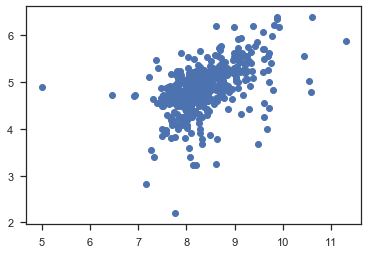

In [148]:
plt.scatter(df['Log_ApplicantIncome'],df['Log_LoanAmount'])
plt.show()

In [151]:
log_reg_lm  = smf.ols(formula='Log_ApplicantIncome~Log_LoanAmount',data=df).fit()
print(log_lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Log_ApplicantIncome   R-squared:                       0.247
Model:                             OLS   Adj. R-squared:                  0.245
Method:                  Least Squares   F-statistic:                     156.4
Date:                 Wed, 10 Jun 2020   Prob (F-statistic):           3.03e-31
Time:                         22:16:18   Log-Likelihood:                -384.65
No. Observations:                  480   AIC:                             773.3
Df Residuals:                      478   BIC:                             781.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.4204      0.2

In [152]:
log_reg_lm.params

Intercept         5.420436
Log_LoanAmount    0.605058
dtype: float64

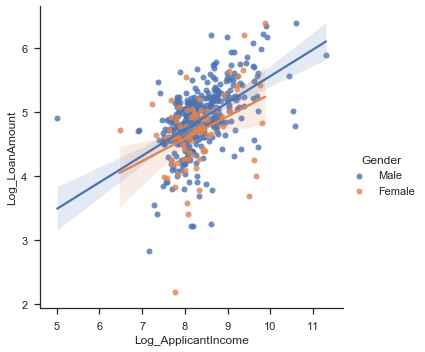

In [203]:
df2 = sns.lmplot(data=df, x='Log_ApplicantIncome', y='Log_LoanAmount',fit_reg=True, hue = 'Gender')

# Target Variable

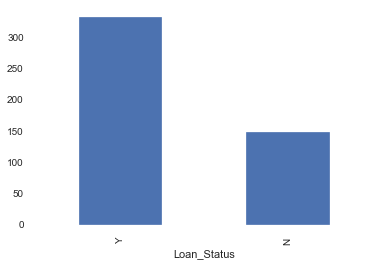

In [96]:
train['Loan_Status'].value_counts().plot.bar()
plt.xlabel('Loan_Status')
plt.show()

### Graficos para Variables Categoricas

Text(435.4286259765625, 0.5, 'ApplicantIncome')

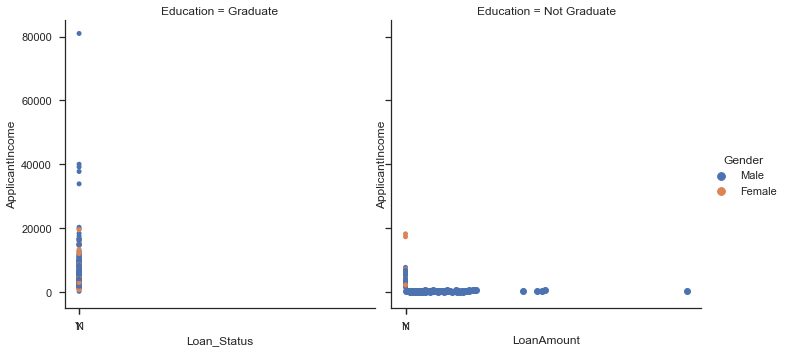

In [204]:
g = sns.catplot(x="Loan_Status", y="ApplicantIncome", hue = "Gender", col= "Education" ,data=train)

plt.scatter(train.ApplicantIncome, train.LoanAmount)
plt.xlabel('LoanAmount')
plt.ylabel('ApplicantIncome')

# Independent Variables (Categorical)

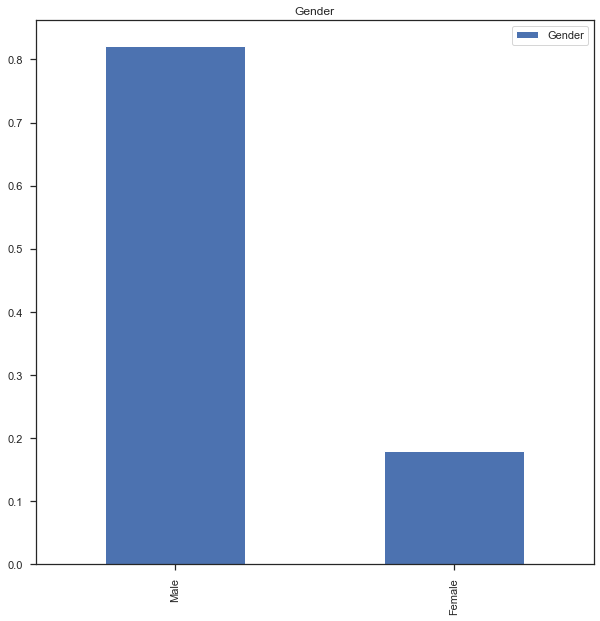

In [229]:
plt.figure(1) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10), title= 'Gender') 
plt.legend()
plt.show()


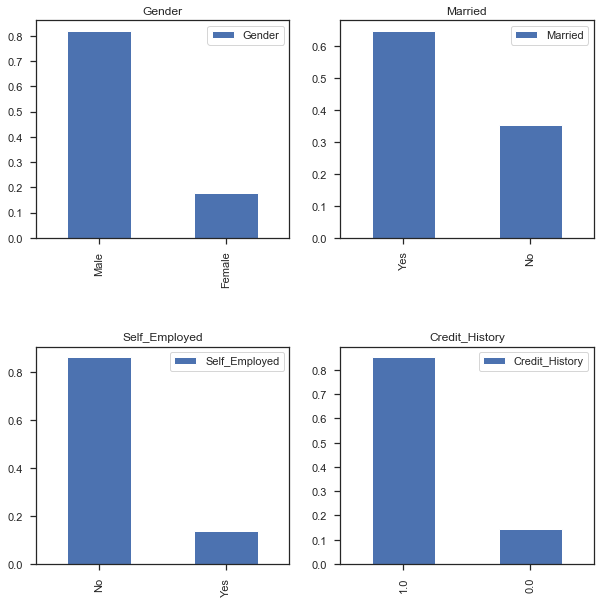

In [212]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10), title= 'Gender') 
plt.legend()
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.legend()
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.legend()
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()


# Independent Variables (Ordinal)

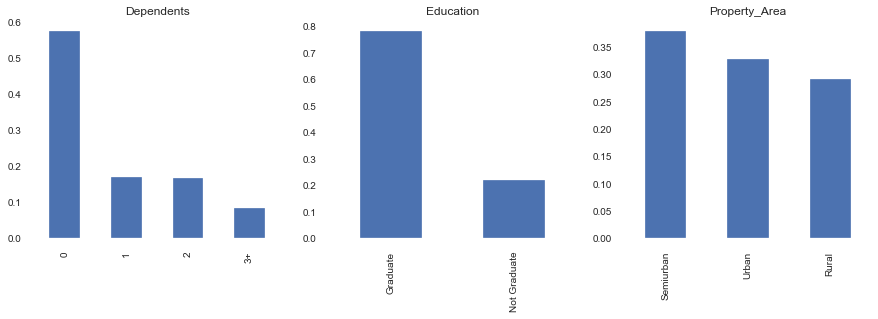

In [34]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,4), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

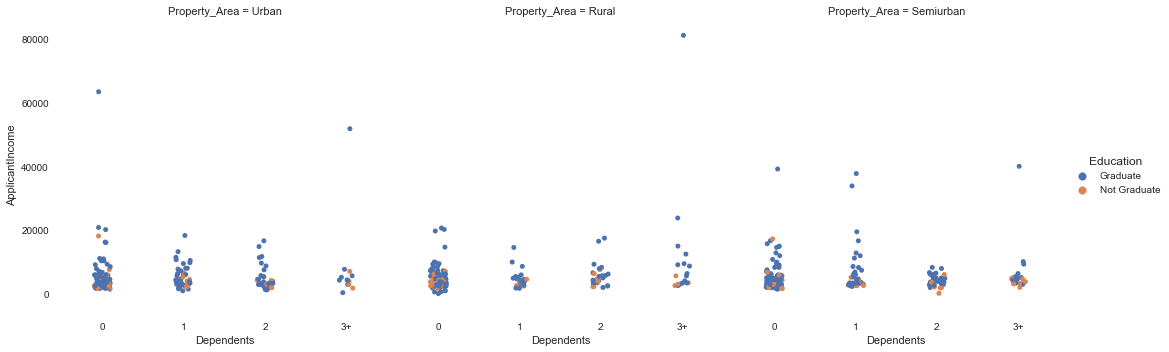

In [35]:
g = sns.catplot(x="Dependents", y="ApplicantIncome", hue = "Education" , col = "Property_Area", col_wrap = 3 , data=train)

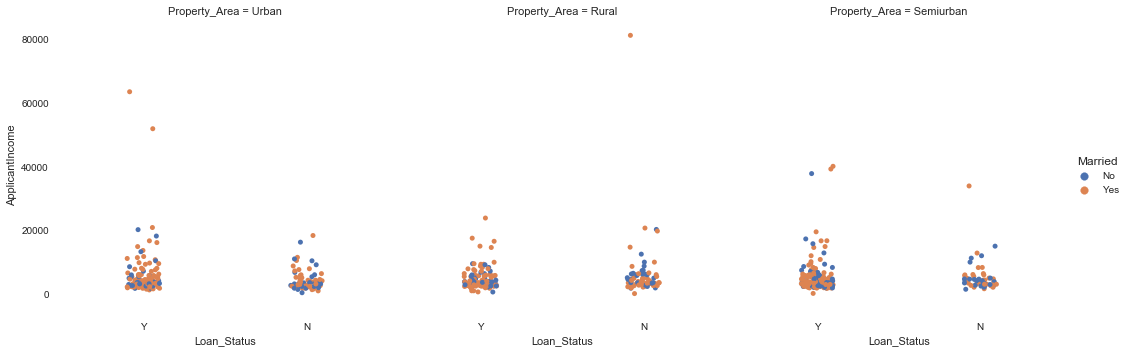

In [36]:
g = sns.catplot(x="Loan_Status", y="ApplicantIncome", hue = "Married" , col = "Property_Area", col_wrap = 3 , data=train)

# Independent Variable (Numerical)

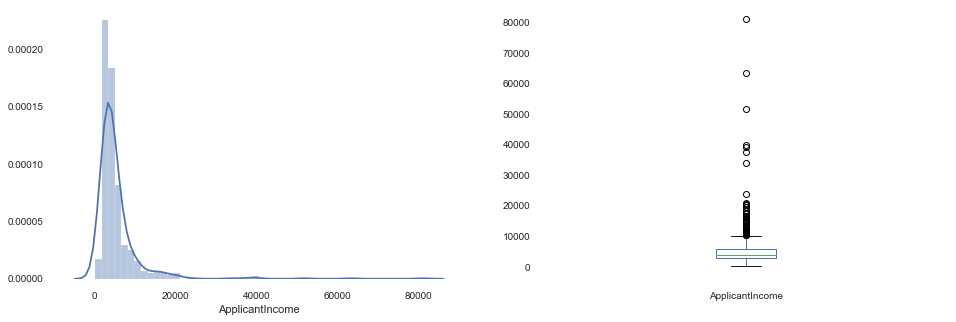

In [37]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [38]:
# Set figsize here
#fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,5))

# if you didn't set the figsize above you can do the following
# fig.set_size_inches(12, 5)

# flatten axes for easy iterating
#for i, ax in enumerate(axes.flatten()):
#    sns.boxplot(x= train.iloc[:, i],  orient='v' , ax=ax)

#fig.tight_layout()

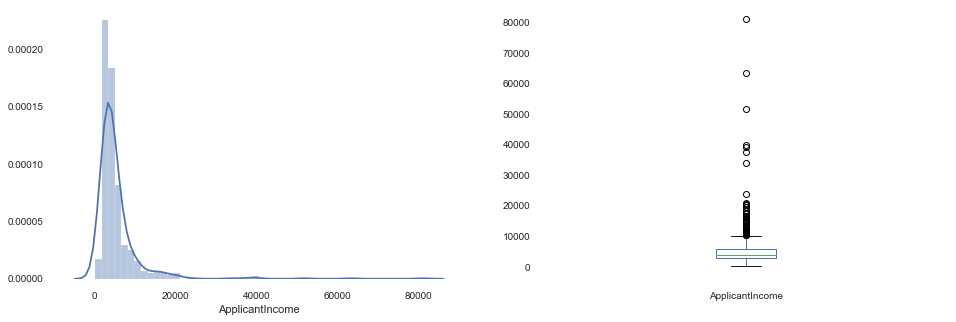

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
#plt.suptitle("")
#plt.show()

Text(0.5, 0.98, '')

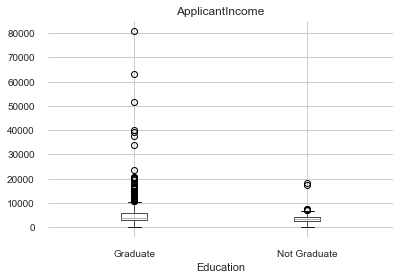

In [40]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")
#Text(0.5,0.98,'')

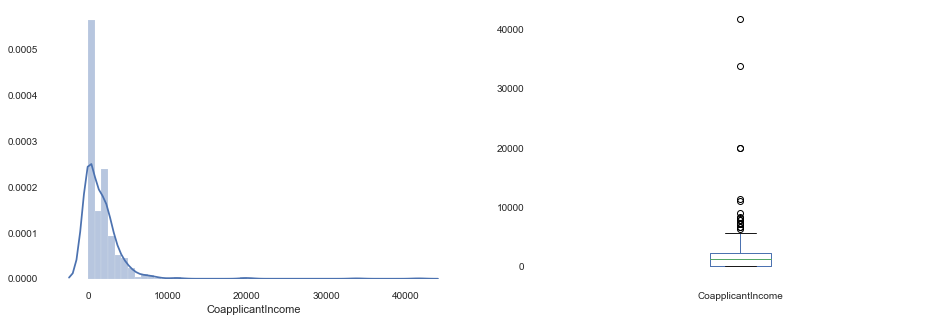

In [41]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [42]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
train.dropna(inplace=True) # drop na

#df = df.dropna(how='any',axis=0)  # ----clear null all colum------- 
#df[~df['B'].isnull()]   # to clean NULL by based on 1 column.---#

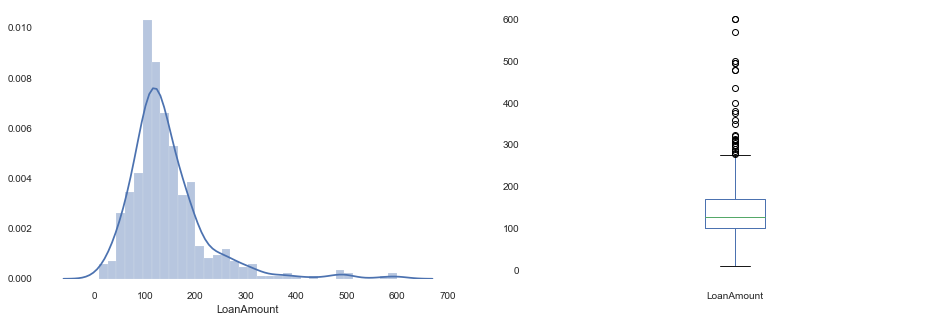

In [44]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(train['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()


# Categorical Independent Variable vs Target Variable

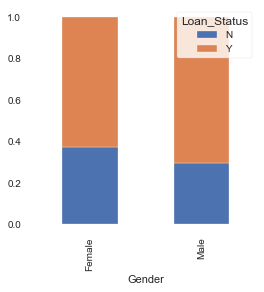

In [45]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

In [46]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

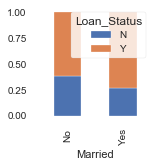

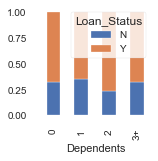

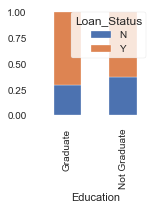

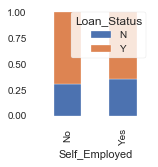

In [47]:
#plt.figure(4) 
#plt.subplot(221)
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(2,2)) 
plt.show() 
#plt.subplot(222)
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(2,2)) 
plt.show() 
#plt.subplot(223)                                                            
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(2,2)) 
plt.show()
#plt.subplot(224)
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(2,2))
plt.show()

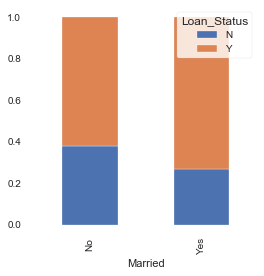

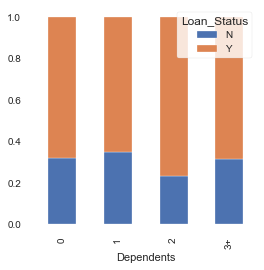

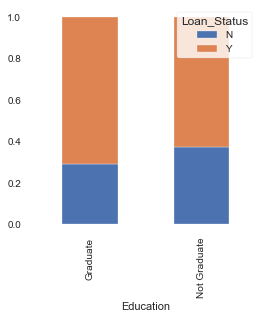

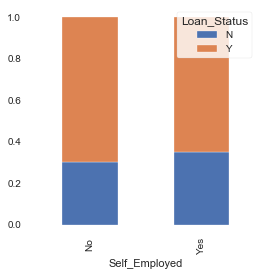

In [48]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4)) 
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
                                                             

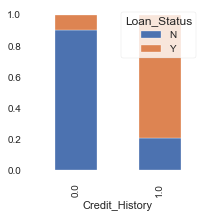

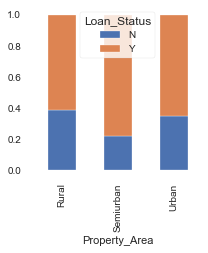

In [49]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(3,3)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(3,3)) 
plt.show()

# Numerical Independent Variable vs Target Variable

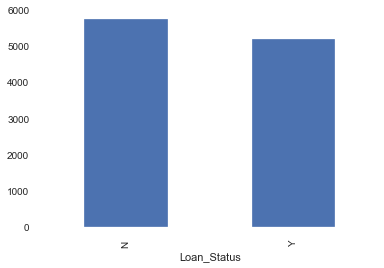

In [50]:
#ingreso promedio 
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

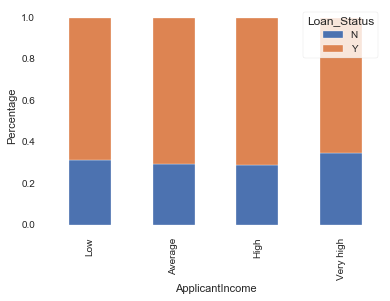

In [51]:
#Ingreso Promedio por Ranogos , al parecer el ingreso no afecta en la probabilidad de otorgrle el credito.
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

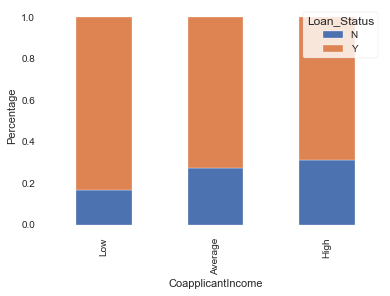

In [52]:
# ingreso del conyuge , ingresos altos -> probabilidad de recibir el credio es alta ... contradictorio 
# respusta es que los clientes en su mayoria son individuales.
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

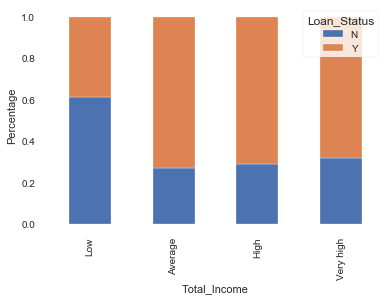

In [53]:
# Proporcion de ingreso familiares bajos tiene una tasa de rechasos mas alta que los otros
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

### Monto  del  Prestamo 

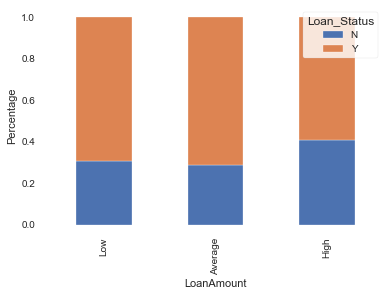

In [54]:
# mayor probabilidad de creditos aprovados para montos pequenos 
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [55]:
# Histograma del MOS
train['Dependents'].describe()
train.groupby('Dependents').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
Dependents,,,,,,
0,4768.167883,1583.339854,132.288321,348.744526,0.857664,6351.507737
1,6267.837500,1487.450000,160.537500,327.300000,0.850000,7755.287500
2,5151.529412,1740.432941,155.341176,341.223529,0.882353,6891.962353
3+,8025.512195,1418.463415,175.097561,327.804878,0.780488,9443.975610


In [56]:
#train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)

train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

# Matriz de Correlacion

### Generando Matriz de Correlacion

In [57]:
# Generando la matriz de correlaciones
matrix = train.corr() 
matrix.head(20)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152,0.900097
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020,0.331580
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753,0.553914
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798,-0.012822
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390,-0.057126
Loan_Status,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000,-0.062465
Total_Income,0.900097,0.331580,0.553914,-0.012822,-0.057126,-0.062465,1.000000


In [58]:
# Graficando la matriz de Correlacion

mask = np.zeros_like(matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

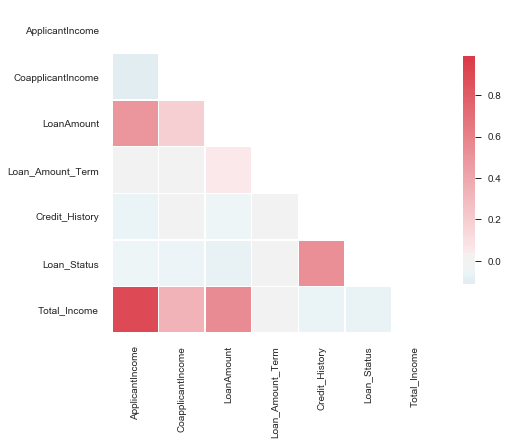

In [59]:
f, ax = plt.subplots(figsize=(9, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(matrix, mask=mask, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

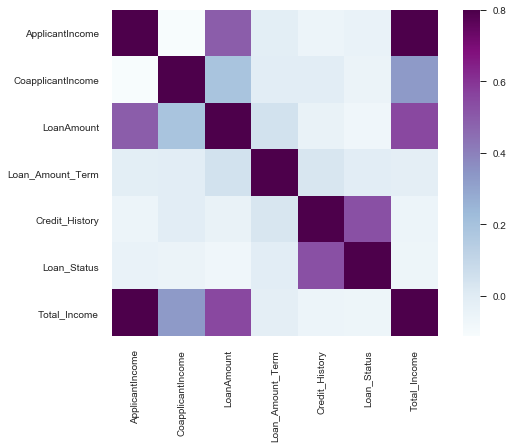

In [60]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

TypeError: 3 is not a string

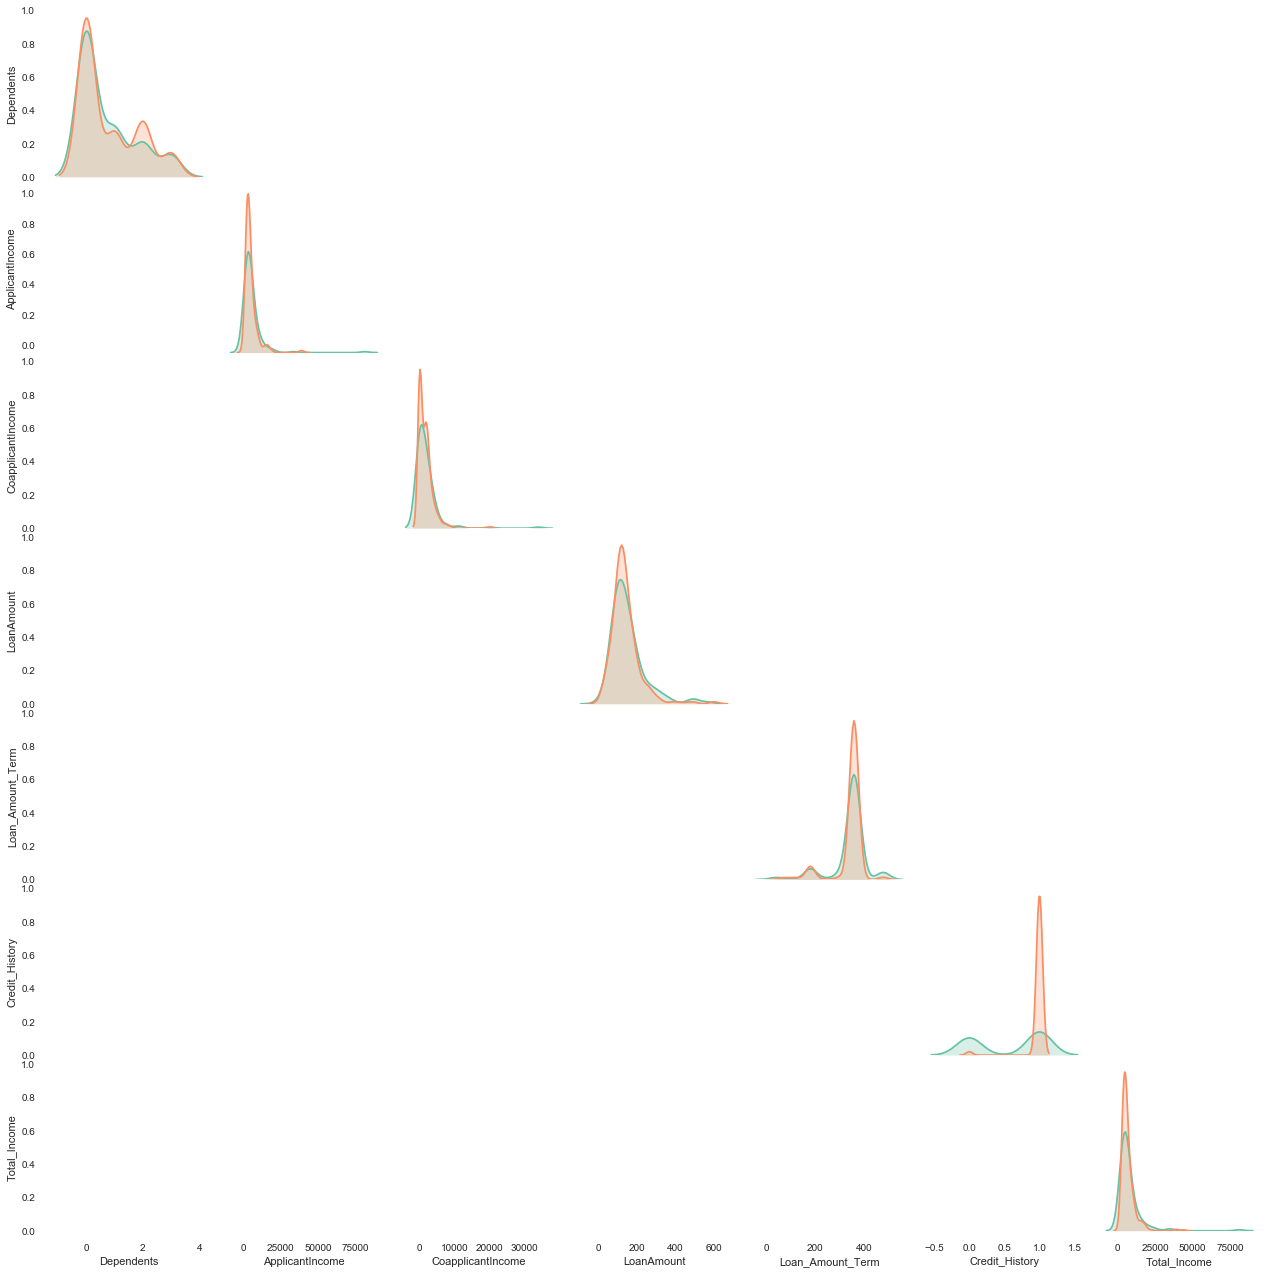

In [61]:
sns.pairplot(train, kind="scatter", hue="Loan_Status", markers=["o", "s"], palette="Set2")
plt.show()

### Determinar qué par de variables están correlacionadas

In [ ]:
for index_1, row in matrix.iteritems():
    for index_2, row in matrix.iteritems():
        if (abs(matrix[index_1][index_2])>0.5) & (index_1 != index_2):
            print (index_1,"|", index_2, "|", "|", matrix[index_1][index_2])

In [ ]:
print("La correlación entre Total_Income   e Y: ",abs(matrix["Total_Income"]["Loan_Status"]))
print("La correlación entre LoanAmount   e Y: ",abs(matrix["LoanAmount"]["Loan_Status"]))
print("La correlación entre Loan_Amount_Term   e Y: ",abs(matrix["Loan_Amount_Term"]["Loan_Status"]))
#print("La correlación entre Dependents   e Y: ",abs(matrix["Dependents"]["Loan_Status"]))

In [ ]:
import pandas as pd
import scipy.stats as scs

def categories(series):
    return range(int(series.min()), int(series.max()) + 1)
  
def chi_square_of_df_cols(col1, col2):
    df_col1, df_col2 = col1, col2

    #result = [[sum((df_col1 == cat1) & (df_col2 == cat2)) for cat2 in categories(df_col2)] for cat1 in categories(df_col1)]
    cats1, cats2 = categories(df_col1), categories(df_col2)

    def aux(is_cat1):
        return [sum(is_cat1 & (df_col2 == cat2))
                for cat2 in cats2]

    result = [aux(df_col1 == cat1)             for cat1 in cats1]
    chi2, p, dof, ex = scs.chi2_contingency(result)
    return (chi2, p)

In [ ]:
print(chi_square_of_df_cols(train['Total_Income'], y_train))             # Estadistico Chi-squared = 41.37 and p-value = 0.0008245382797385986
#print(chi_square_of_df_cols(df_join['Max_Atr_18M'], y_train))            # Estadistico Chi-squared = 310.99 and p-value = 1.33e-69

### Se elige porque el estadistico Chi-squared es mas alto y su p-value es mucho menor al compararlo con la variable Target

### Control de Nulos 

In [ ]:
train.isnull().sum()

In [ ]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

### Se requiere separar la variable objetivo en un data set separado para usar sckit learn

In [ ]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

### Se generan variables binarias para las variables categoricas 

In [ ]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,  penalty='l2', random_state=1, solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

In [ ]:
# "Replace NaN with zero and infinity with large finite numbers."
#test[:] = np.nan_to_num(test)



With np.isnan(X) you get a boolean mask back with True for positions containing NaNs.

With np.where(np.isnan(X)) you get back a tuple with i, j coordinates of NaNs.

Finally, with np.nan_to_num(X) you "replace nan with zero and inf with finite numbers".















In [ ]:
pred_test = model.predict(test)

In [ ]:
import sklearn
print(sklearn.__version__)